# 🏀 NBA Player Steph Curry - Shot Probability Analysis

"""
Project Description:

In this project, we will analyze real shooting data for NBA player Steph Curry to understand his shooting behavior and performance. 
We will use probability concepts to answer questions such as:

- What is the probability of Steph Curry making a shot?
- What is the probability of making a 3-point shot?
- What is the probability of making a shot given that it's from long distance?

This analysis helps us understand patterns in player performance and make data-informed predictions.

🔧 Tools Used:
- Python
- pandas, matplotlib, seaborn

 Concepts Covered:
- Marginal Probability
- Conditional Probability
- Joint Probability
- Data Visualization

Let's begin by loading the dataset and exploring the data structure.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r"C:\Users\wasee\OneDrive\Desktop\stephen_curry_shots_2023.csv")
df.head()

,top,left,date,qtr,time_remaining,result,shot_type,distance_ft,lead,player_team_score,opponent_team_score,opponent,team,season,color
0,63,300,"Oct 18, 2022",1st Qtr,7:27,False,2,6,True,9,6,LAL,GSW,2023,red
1,133,389,"Oct 18, 2022",1st Qtr,7:22,True,2,17,True,11,6,LAL,GSW,2023,green
2,326,247,"Oct 18, 2022",1st Qtr,7:11,False,3,27,True,11,6,LAL,GSW,2023,red
3,249,89,"Oct 18, 2022",1st Qtr,5:16,False,3,25,True,19,13,LAL,GSW,2023,red
4,282,158,"Oct 18, 2022",1st Qtr,3:52,False,3,24,True,22,17,LAL,GSW,2023,red


In [4]:

df.info()


df.describe()

# معرفة القيم الفريدة في أهم الأعمدة
print("Shot result:", df['result'].unique())
print("Shot type:", df['shot_type'].unique())
print("Quarter:", df['qtr'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1434 entries, 0 to 1433
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   top                  1434 non-null   int64 
 1   left                 1434 non-null   int64 
 2   date                 1434 non-null   object
 3   qtr                  1434 non-null   object
 4   time_remaining       1434 non-null   object
 5   result               1434 non-null   bool  
 6   shot_type            1434 non-null   int64 
 7   distance_ft          1434 non-null   int64 
 8   lead                 1434 non-null   bool  
 9   player_team_score    1434 non-null   int64 
 10  opponent_team_score  1434 non-null   int64 
 11  opponent             1434 non-null   object
 12  team                 1434 non-null   object
 13  season               1434 non-null   int64 
 14  color                1434 non-null   object
dtypes: bool(2), int64(7), object(6)
memory usage: 148.6+ KB

In [6]:
# إجمالي عدد التسديدات
total_shots = len(df)

# عدد التسديدات الناجحة (result = True)
made_shots = df['result'].sum()

# عدد التسديدات الفاشلة
missed_shots = total_shots - made_shots

# عدد تسديدات النوع 2 و 3
two_pt_attempts = (df['shot_type'] == 2).sum()
three_pt_attempts = (df['shot_type'] == 3).sum()

# عدد التسديدات الناجحة من النوع 3
three_pt_made = df[(df['shot_type'] == 3) & (df['result'] == True)].shape[0]

# حساب الدقة العامة
overall_accuracy = made_shots / total_shots * 100

# عرض النتائج
print("📊 Overall Shooting Statistics")
print(f"• Total Shots: {total_shots}")
print(f"• Made Shots: {made_shots}")
print(f"• Missed Shots: {missed_shots}")
print(f"• 2-Point Attempts: {two_pt_attempts}")
print(f"• 3-Point Attempts: {three_pt_attempts}")
print(f"• 3-Point Made: {three_pt_made}")
print(f"• Overall Shooting Accuracy: {overall_accuracy:.2f}%")


📊 Overall Shooting Statistics
• Total Shots: 1434
• Made Shots: 703
• Missed Shots: 731
• 2-Point Attempts: 648
• 3-Point Attempts: 786
• 3-Point Made: 329
• Overall Shooting Accuracy: 49.02%


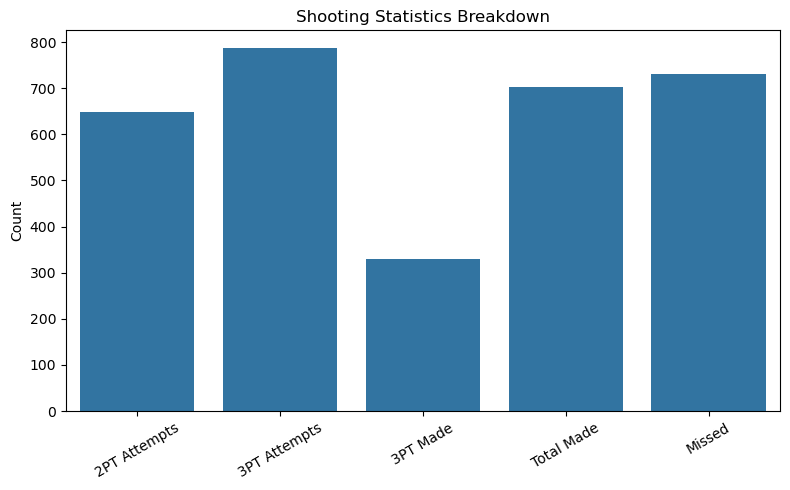

In [14]:

counts = {
    '2PT Attempts': two_pt_attempts,
    '3PT Attempts': three_pt_attempts,
    '3PT Made': three_pt_made,
    'Total Made': made_shots,
    'Missed': missed_shots,
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))
plt.title("Shooting Statistics Breakdown")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### “Steph Curry attempted more 3-point shots than 2-point shots in this dataset, but his overall accuracy was below 50%.

In [7]:
# 🔢 الاحتمالات الأساسية
p_made = made_shots / total_shots
p_missed = missed_shots / total_shots
p_3pt = three_pt_attempts / total_shots
p_made_given_3pt = three_pt_made / three_pt_attempts
p_joint_made_and_3pt = three_pt_made / total_shots

# عرض النتائج
print("📊 Probabilities")
print(f"• P(Made): {p_made:.2f}")
print(f"• P(Missed): {p_missed:.2f}")
print(f"• P(3PT): {p_3pt:.2f}")
print(f"• P(Made | 3PT): {p_made_given_3pt:.2f}")
print(f"• P(Made ∩ 3PT): {p_joint_made_and_3pt:.2f}")


📊 Probabilities
• P(Made): 0.49
• P(Missed): 0.51
• P(3PT): 0.55
• P(Made | 3PT): 0.42
• P(Made ∩ 3PT): 0.23


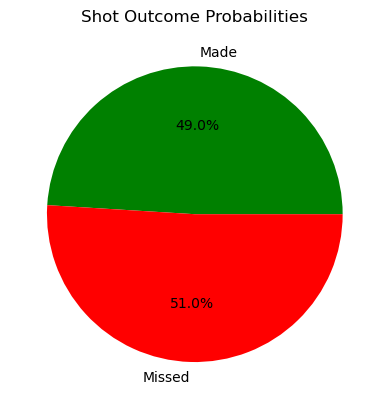

In [15]:
plt.pie([p_made, p_missed], labels=["Made", "Missed"], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Shot Outcome Probabilities")
plt.show()


### "The pie chart illustrates the near-even split between successful and missed shots, with a slightly higher proportion of missed attempts."

In [9]:
# تسديدات الربع الرابع
q4_df = df[df['qtr'] == '4th Qtr']

# عدد التسديدات الناجحة في الربع الرابع
q4_made = q4_df['result'].sum()

# P(Made | 4th Qtr)
p_made_given_q4 = q4_made / len(q4_df)

print(f"P(Made | 4th Qtr) = {p_made_given_q4:.2f}")


P(Made | 4th Qtr) = 0.49


In [10]:
# تصفية الحالات التي كان الفريق فيها خاسر (lead = False)
losing_df = df[df['lead'] == False]

# عدد التسديدات الناجحة أثناء التأخر
made_while_losing = losing_df['result'].sum()

# P(Made | Losing)
p_made_given_losing = made_while_losing / len(losing_df)

print(f"P(Made | Losing) = {p_made_given_losing:.2f}")


P(Made | Losing) = 0.43


In [11]:
# تحويل الوقت إلى ثواني
df['time_seconds'] = df['time_remaining'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

# فلترة الربع الرابع وآخر دقيقتين
last_2min_q4 = df[(df['qtr'] == '4th Qtr') & (df['time_seconds'] <= 120)]

# احتمال النجاح
p_made_last2_q4 = last_2min_q4['result'].sum() / len(last_2min_q4)

print(f"P(Made | Last 2 min of Q4) = {p_made_last2_q4:.2f}")


P(Made | Last 2 min of Q4) = 0.41


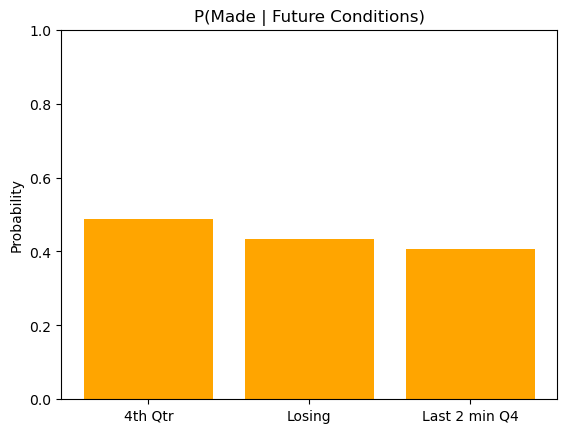

In [16]:
conditions = ['4th Qtr', 'Losing', 'Last 2 min Q4']
values = [p_made_given_q4, p_made_given_losing, p_made_last2_q4]

plt.bar(conditions, values, color='orange')
plt.ylim(0,1)
plt.ylabel("Probability")
plt.title("P(Made | Future Conditions)")
plt.show()


### "Steph Curry’s shot success slightly decreases in high-pressure scenarios, especially during the last 2 minutes of the 4th quarter."

In [12]:
# تصفية التسديدات الناجحة فقط
made_df = df[df['result'] == True]

# كم منها كانت 3 نقاط
made_and_3pt = (made_df['shot_type'] == 3).sum()

# P(3PT | Made)
p_3pt_given_made = made_and_3pt / len(made_df)

print(f"P(3PT | Made) = {p_3pt_given_made:.2f}")


P(3PT | Made) = 0.47


In [13]:
# كم من التسديدات الناجحة كانت في الربع الرابع
made_in_q4 = (made_df['qtr'] == '4th Qtr').sum()

# P(4th Qtr | Made)
p_q4_given_made = made_in_q4 / len(made_df)

print(f"P(4th Qtr | Made) = {p_q4_given_made:.2f}")


P(4th Qtr | Made) = 0.26


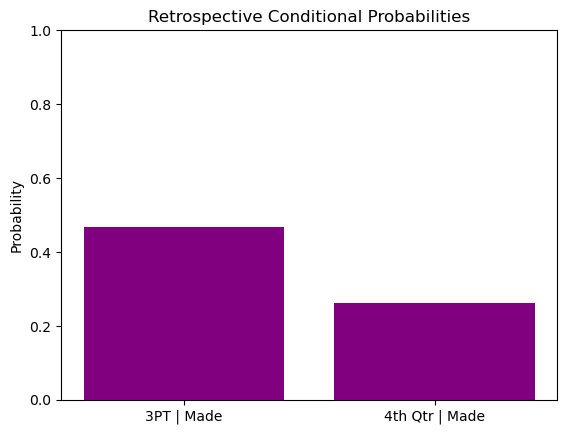

In [17]:
conditions = ['3PT | Made', '4th Qtr | Made']
values = [p_3pt_given_made, p_q4_given_made]

plt.bar(conditions, values, color='purple')
plt.ylim(0,1)
plt.ylabel("Probability")
plt.title("Retrospective Conditional Probabilities")
plt.show()


### "Nearly half of the successful shots were 3-pointers, while only about a quarter occurred in the 4th quarter. This shows Curry’s consistency across quarters but clear preference for long-range shots."